In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


**Form this notebook you can learn, one of the Wrapper feature selection method(Step backward feature selection).**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("../input/creditcardfraud/creditcard.csv")

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
data.shape

(284807, 31)

In [7]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

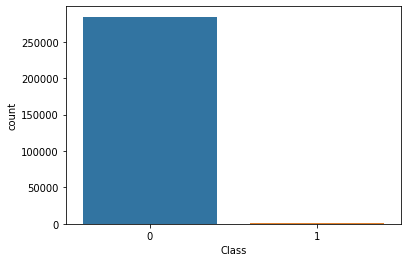

In [8]:
sns.countplot(x = 'Class',data=data)
plt.show()

In [9]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [10]:
data = data.drop('Time',axis=1)

> Here i am trying to find outliers by help of box plot, but my system take too much time, you guys can uncomment and try it. thank you!

In [11]:
# fig, axes = plt.subplots(3, 2, figsize=(18, 10))

# fig.suptitle('Price Range vs all numerical factor')

# sns.boxplot(ax=axes[0, 0], data=data, x='V1', y='Class',palette = "RdBu")
# sns.boxplot(ax=axes[0, 1], data=data, x='V2', y='Class',palette = "RdBu")
# sns.boxplot(ax=axes[1, 0], data=data, x='V3', y='Class',palette = "RdBu")
# sns.boxplot(ax=axes[1, 1], data=data, x='V4', y='Class',palette = "RdBu")
# sns.boxplot(ax=axes[2,0],data=data,x='V5',y='Class',palette = "RdBu")
# sns.boxplot(ax=axes[2,1],data=data,x='V6',y='Class',palette = "RdBu")
# plt.show()

In [12]:
# fig, axes = plt.subplots(3, 2, figsize=(18, 10))

# fig.suptitle('Price Range vs all numerical factor')

# sns.boxplot(ax=axes[0, 0], data=data, x='V5', y='Class',palette = "RdBu")
# sns.boxplot(ax=axes[0, 1], data=data, x='V6', y='Class',palette = "RdBu")
# sns.boxplot(ax=axes[1, 0], data=data, x='V7', y='Class',palette = "RdBu")
# sns.boxplot(ax=axes[1, 1], data=data, x='V8', y='Class',palette = "RdBu")
# sns.boxplot(ax=axes[2,0],data=data,x='V9',y='Class',palette = "RdBu")
# sns.boxplot(ax=axes[2,1],data=data,x='V10',y='Class',palette = "RdBu")
# plt.show()

In [13]:
# fig, axes = plt.subplots(3, 2, figsize=(18, 10))

# fig.suptitle('Price Range vs all numerical factor')

# sns.boxplot(ax=axes[0, 0], data=data, x='V11', y='Class',palette = "RdBu")
# sns.boxplot(ax=axes[0, 1], data=data, x='V12', y='Class',palette = "RdBu")
# sns.boxplot(ax=axes[1, 0], data=data, x='V13', y='Class',palette = "RdBu")
# sns.boxplot(ax=axes[1, 1], data=data, x='V14', y='Class',palette = "RdBu")
# sns.boxplot(ax=axes[2,0],data=data,x='V15',y='Class',palette = "RdBu")
# sns.boxplot(ax=axes[2,1],data=data,x='V16',y='Class',palette = "RdBu")
# plt.show()

In [14]:
# fig, axes = plt.subplots(3, 2, figsize=(18, 10))

# fig.suptitle('Price Range vs all numerical factor')

# sns.boxplot(ax=axes[0, 0], data=data, x='V17', y='Class',palette = "RdBu")
# sns.boxplot(ax=axes[0, 1], data=data, x='V18', y='Class',palette = "RdBu")
# sns.boxplot(ax=axes[1, 0], data=data, x='V19', y='Class',palette = "RdBu")
# sns.boxplot(ax=axes[1, 1], data=data, x='V20', y='Class',palette = "RdBu")
# sns.boxplot(ax=axes[2,0],data=data,x='V21',y='Class',palette = "RdBu")
# sns.boxplot(ax=axes[2,1],data=data,x='V22',y='Class',palette = "RdBu")
# plt.show()

In [15]:
# fig, axes = plt.subplots(3, 2, figsize=(18, 10))

# fig.suptitle('Price Range vs all numerical factor')

# sns.boxplot(ax=axes[0, 0], data=data, x='V23', y='Class',palette = "RdBu")
# sns.boxplot(ax=axes[0, 1], data=data, x='V24', y='Class',palette = "RdBu")
# sns.boxplot(ax=axes[1, 0], data=data, x='V25', y='Class',palette = "RdBu")
# sns.boxplot(ax=axes[1, 1], data=data, x='V26', y='Class',palette = "RdBu")
# sns.boxplot(ax=axes[2,0],data=data,x='V27',y='Class',palette = "RdBu")
# sns.boxplot(ax=axes[2,1],data=data,x='V28',y='Class',palette = "RdBu")
# plt.show()

# Feature selection

# Wrapper Feature Selection Methods

# Step backward feature selection

> Step Backward Feature Selection starts by fitting a model using all features in the data set and determining its performance.
> 
> Then, it trains models on all possible combinations of all<b> features -1, and removes the feature that returns the model with the lowest performance</b>.
> 
> In the third step it trains models in all possible combinations of the features remaining from step 2 -1 feature, and removes the feature that produced the lowest performing model.

> The algorithm stops on a criteria determined by the user. This criteria could be that the model performance does not decrease beyond a certain threshold, or alternatively, as in the <b>mlxtend implementation</b>, when we reach a certain number of selected features.
> 
> The evaluation metric can be the <b>roc_auc for classification</b>

> Step Backward Feature Selection is called <b>greedy, because it evaluates all possible n, and then n-1 and n-2 and so on feature combinations</b>. Therefore, it is very computationally expensive, and sometimes, if feature space is big, even unfeasible.

> In the <b>mlxtend implementation</b> of the Step Backward Feature Selection, the stopping criteria is an arbitrarily set number of features. So the search will finish when we reach the desired number of selected features.
> 
> This is somewhat arbitrary, we might be selecting a sub-opimal number of features, or likewise, a high number of features. But, by looking at the performance metric returned by the algorithm as it selects the features, we can have a view, if more features do add value, or not.
> 
> Here I will use the Step Backward Feature Selection algorithm from <b>mlxtend in a classification</b>

In [16]:
## Import the libraries
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [17]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['Class'], axis=1),
    data['Class'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape,y_train.shape,y_test.shape

((199364, 29), (85443, 29), (199364,), (85443,))

# Step Backward Feature Selection
For the Step Backward feature selection algorithm, we are going to use the class SFS from MLXtend:

In [18]:
# within the SFS we indicate:
# 1) the algorithm we want to create, in this case RandomForests
# 3) wheter to perform step backward
# 4) the evaluation metric: in this case the roc_auc
# 5) the want cross-validation

sfs = SFS(RandomForestClassifier(n_estimators=10, n_jobs=4, random_state=0),
          k_features=20, # the lower the features we want, the longer this will take
          forward=False,
          floating=False,
          verbose=2,
          scoring='roc_auc',
          cv=2)

sfs = sfs.fit(np.array(X_train), y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:  3.9min finished

[2022-02-11 16:34:56] Features: 28/20 -- score: 0.9343785621371266[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:  3.8min finished

[2022-02-11 16:38:44] Features: 27/20 -- score: 0.931519386414909[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:  3.6min finished

[2022-02-11 16:42:17] Features: 26/20 -- score: 0.9286325206628474[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done

# Compare performance of feature subsets

In [19]:
# function to train random forests and evaluate the performance

def run_randomForests(X_train, X_test, y_train, y_test):
    rf = RandomForestClassifier(n_estimators=200, random_state=39, max_depth=4)
    rf.fit(X_train, y_train)

    print('Train set')
    pred = rf.predict_proba(X_train)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    
    print('Test set')
    pred = rf.predict_proba(X_test)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

In [20]:
selected_feat= X_train.columns[list(sfs.k_feature_idx_)]

selected_feat

Index(['V1', 'V2', 'V5', 'V6', 'V7', 'V8', 'V9', 'V11', 'V12', 'V13', 'V14',
       'V15', 'V16', 'V17', 'V18', 'V20', 'V22', 'V25', 'V26', 'V28'],
      dtype='object')

In [21]:
# evaluate performance of algorithm built
# using selected features

run_randomForests(X_train[selected_feat],
                  X_test[selected_feat],
                  y_train, y_test)

Train set
Random Forests roc-auc: 0.960963030913005
Test set
Random Forests roc-auc: 0.9459851376303664


In [22]:
# and for comparison, we train random forests using
# all features (except the correlated ones, which we removed already)

run_randomForests(X_train,
                  X_test,
                  y_train, y_test)

Train set
Random Forests roc-auc: 0.9656585770596077
Test set
Random Forests roc-auc: 0.9629832471349073
